(640, 640, 3)


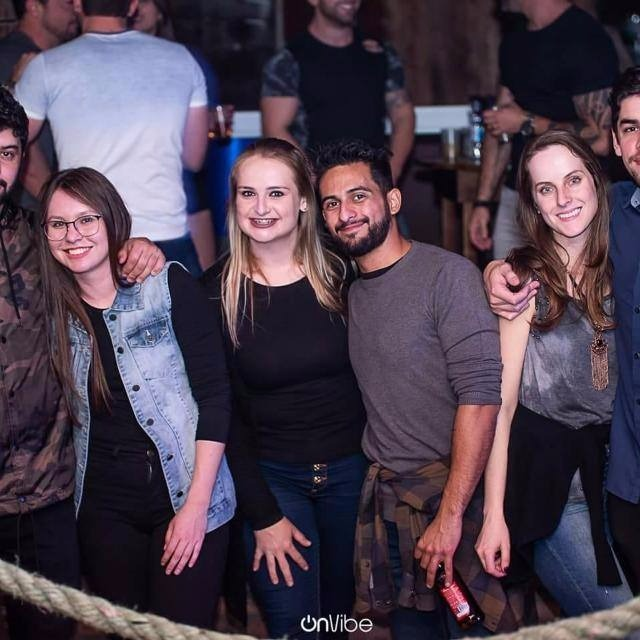

3 (1, 44, 46, 46)


(-0.5, 639.5, 639.5, -0.5)

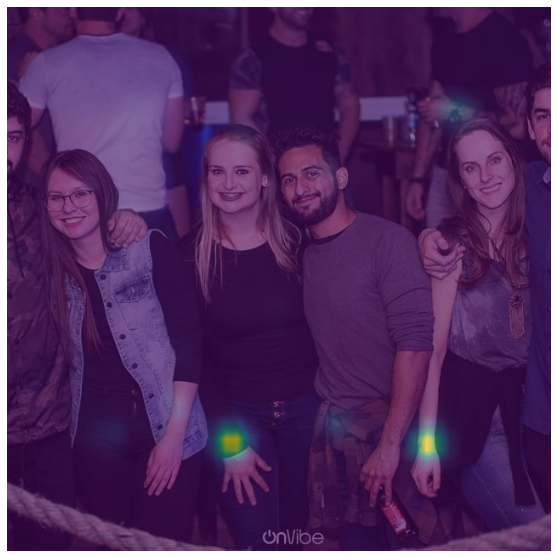

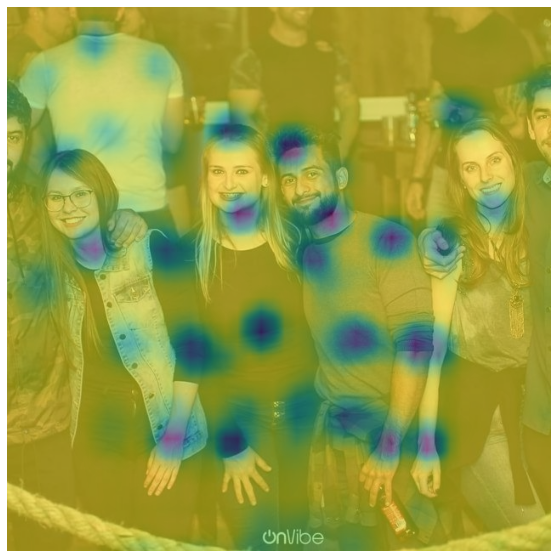

In [29]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt 
import zipfile 

arquivo_proto = "/content/visão-computacional-openCV/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
arquivo_peso = "/content/visão-computacional-openCV/pose/body/mpi/pose_iter_160000.caffemodel"

imagem = cv2.imread("/content/visão-computacional-openCV/imagens/body/multiple/multiple_1.jpeg")

#print ("Altura (height): %d pixels" % (imagem.shape[0]))
#print ("Largura (width): %d pixels" % (imagem.shape[1]))
#print ("Canais (channels): %d"      % (imagem.shape[2]))

imagem_altura = (imagem.shape[0])
imagem_largura =(imagem.shape[1])

#print(imagem_altura,imagem_largura)
print(imagem.shape)


cv2_imshow(imagem)
cv2.waitKey()

modelo = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_peso)
altura_entrada = 368  # int((altura_entrada/ imagem_altura) * imagem_largura) (formula para deixar a largura proporcional a altura )
largura_entrada = 368

blob_entrada = cv2.dnn.blobFromImage(image = imagem, scalefactor =1.0/255,
size = (largura_entrada, altura_entrada),mean = (0,0,0),swapRB = False,
crop = False)

modelo.setInput(blob_entrada)
saida = modelo.forward()

print("3",saida.shape)

#print("4",saida [0][0])

ponto = 4 #pulso direito
mapa_confianca = saida[0,ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca,(imagem_largura, imagem_altura))
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR))
plt.imshow(mapa_confianca,alpha = 0.6)
plt.axis("off")


ponto = 15 
mapa_confianca = saida[0,ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca,(imagem_largura, imagem_altura))
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR))
plt.imshow(mapa_confianca,alpha = 0.6)
plt.axis("off")

